<a href="https://colab.research.google.com/github/leeCodingStudio/Python_NLP/blob/master/10_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. BERT 모델
* 2018년도 Google의 논문에서 처음 제안된 모델로, Transformer의 인코더 기반의 언어 모델
* unlabeled data로 부터 pre-train을 진행한 후, 특정 downstream task에 fine-tuning을 하는 모델
* deep bidirectional을 더욱 강조하여 기존의 모델들과의 차별성을 강조
* 하나의 output layer만을 pre-trained BERT 모델에 추가하여 NLP의 다양한 주요 task(11개)에서 SOTA를 달성

### 1-1. BERT 모델 개요
* LM의 pre-training 방법은 BERT 이전에도 많이 연구되고 있었고, 실제로 좋은 성능을 내고 있었음
* 특히 문장 단위의 task에서 두각을 보였는데, 이러한 연구들은 두 문장의 관계를 전체적으로 분석하여 예측하는 것을 목표로 함
* 문장 뿐만 아니라 토큰 단위의 task(개체명 인식, QA 등)에서도 좋은 성능을 보였음
* downstream 작업에 사전 학습된 벡터 표현을 적용하는 방법
    - feature based approach
        * 대표적으로 ELMo
        * pre-trained representations을 하나의 추가적은 feature로 활용해 사용
    - fine-tuning approach
        * paramerters 수는 최소화하고, 모든 pre-trained 파라미터를 조금만 바꿔서 downstream 작업을 학습

> 일반적으로 language representation을 학습하기 위해 uni-directional 언어 모델을 사용하는데 기존의 위 방법이 사전 학습의 성능을 쩔어뜨린하고 주장

### 1-2. BERT 모델 구조
* Pre-training part와 Fine-tuning part로 나눠짐
* Pre-training 에서는 다양한 pre-training tasks의 unlabeled data를 활용해 파라미터를 설정하고 이를 바탕으로 학습된 모델은 Fine-tining에서 downstram tasks의 labeled data를 이용해 fine-tuning
* 양방향 Transformer encoder를 여러 층 쌓은 것(multi-layer bidirectional Transformer encoder)
    * BERT base: 110M(약 1억1천만) 파라미터
    * BERT large: 340M(약 3억4천만) 파라미터
* BERT base모델은 OpenAI의 GPT와의 비교를 위해 파라미터 수를 동일하게 만들어 진행

### 1-3. BERT 입/출력
* 총 3가지(Token, Segment, Position)의 Embedding vector를 합쳐서 input으로 사용
* 모든 input 시퀀스의 첫번째 토큰은 [CLS] 토큰인데, [CLS] 토큰과 대응되는 최종 hidden state는 분류 문데를 해결하기 위해 sequence representation들을 함축
* input 시퀀스는 한 쌍의 문장으로 구성되고, 문장 쌍의 각 문자들을 [SEP] 토큰으로 분리하고 각 문장이 A문장인지, B문장인지 구분하기 위한 임베딩을 사용
* Token Embeddings는 WordPiece embedding을 사용
* input representation은 이러한 대응되는 토큰(segment + token + position)을 전부 더함

### 1-4. BERT의 사전 학습
* MLM: Masked Language Modeling
    - input tokens의 일정 비율을 마스킹하고, 마스킹 된 토큰을 예측하는 과정
    - 입력으로 돌아온 단어 토큰 중 일부를 [MASK] token으로 바꿔서 학습
    - pre-training과 fine-tuning 사이의 mismatch가 발생([MASK] token이 fine-tuning 과정에서는 나타나지 않기 때문)
    - 위 문제를 해결하기 위해 token에서 추가적인 처리
        - 80%의 경우: token을 [MASK] token으로 바꿈
        - 10%의 경우: token을 random word로 바꿈
        - 10%의 경우: token을 원래 단어 그대로 둠
* NSP: Next Sentence Prediction
    - 많은 NLP의 downstream task(QA, NLI 등) 두 문장 사이의 관계를 이행하는 것이 핵심
    - 문장 A와 B를 선택할 때, 50%는 실제 A의 다음 문장인 B를 고르고, 나머지 50%는 랜덤 문장 B를 고름

* 사전 학습 과정은 많은 데이터를 필요로 하는데, corpus 구축을 위해 BooksCorpus(약 8억개의 단어)와 English Wikipedia(약 25억개의 단어)를 사용
* Wikipedia는 본문망 사용했고, 리스트, 표, 헤더 등은 무시
* 긴 인접 시퀀스를 뽑아내기 위해서는 문서 단위의 corpus를 사용하는 것이 문장 단위의 corpus를 사용하는 것 보다 훨씬 유리

# 2. BERT 요약
* ELMo가 pretraining 관점을 제시했으면, GPT-1은 transformer 구조에 적용해서 transformer가 pretraining에 효과적이라는 것을 밝히고, BERT가 양방향으로 개선
* Deep Bidirectional Model을 통해 같은 pretraining 모델로 만든 모든 NLP Task에서 SOTA를 달성
* pretraining 모델을 통해 적은 리소스로도 좋은 성능을 낼 수 있음
* 대신 사전 학습에 많은 시간과 비용이 필요

# 3. 간단한 답변 랭킹 모델 만들기
출처: https://github.com/songys/Chatbot_data

In [4]:
import urllib.request
import pandas as pd

In [19]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename='ChatBotData.csv')

('ChatBotData.csv', <http.client.HTTPMessage at 0x7b8ba617a9b0>)

In [20]:
train_dataset = pd.read_csv('ChatBotData.csv')
print(len(train_dataset))

11823


In [21]:
train_dataset

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [24]:
# 데이터셋 결측값 확인
train_dataset.replace('', float('NaN'), inplace=True)
print(train_dataset.isnull().values.any())

False


In [25]:
# 데이터셋 중복 제거
train_dataset = train_dataset.drop_duplicates(['Q']).reset_index(drop=True)
print(len(train_dataset))

11662


In [26]:
train_dataset = train_dataset.drop_duplicates(['A']).reset_index(drop=True)
print(len(train_dataset))

7731


In [28]:
import matplotlib.pyplot as plt

질문의 최대 길이:  56
질문의 평균 길이:  13.6732634846721


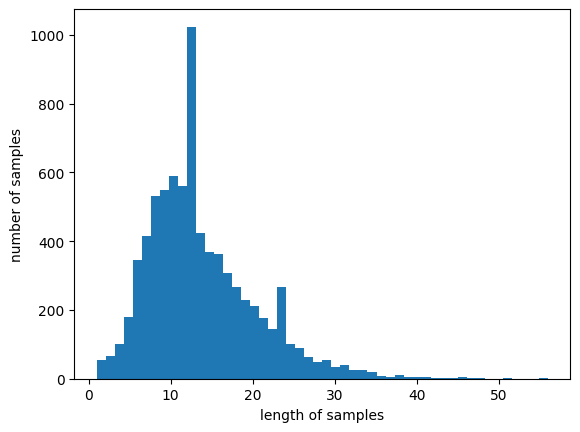

In [29]:
question_list = list(train_dataset['Q'])
answer_list = list(train_dataset['A'])

print('질문의 최대 길이: ', max(len(question) for question in question_list))
print('질문의 평균 길이: ', sum(map(len, question_list))/len(question_list))

plt.hist([len(question) for question in question_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

답변의 최대 길이:  76
답변의 평균 길이:  15.611563833915406


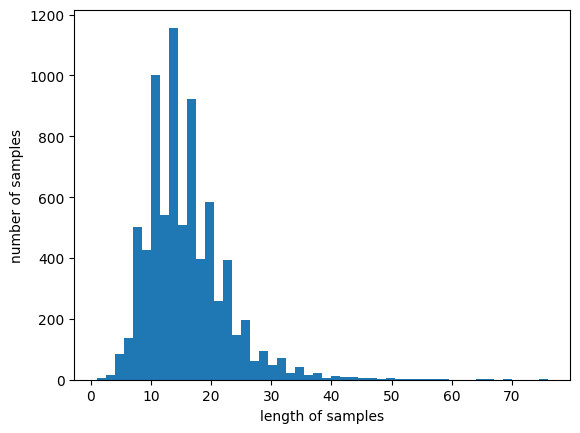

In [32]:
print('답변의 최대 길이: ', max(len(answer) for answer in answer_list))
print('답변의 평균 길이: ', sum(map(len, answer_list))/len(answer_list))

plt.hist([len(answer) for answer in answer_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
import random

In [34]:
print(f'question 개수: {len(question_list)}')
print(f'answer 개수: {len(answer_list)}')

question 개수: 7731
answer 개수: 7731


In [35]:
response_candidates = random.sample(answer_list, 500)

In [36]:
response_candidates[:10]

['안타깝네요. 증거를 지금이라도 모아봐요.',
 '사랑이 모두 정답이 될수는 없어요.',
 '머리랑 마음이 또 다르죠.',
 '정말 맘고생 많았어요.',
 '연락이 오길 기다리지마세요.',
 '사귀다 보면 생각보다 신겨 쓰이는 일이에요.',
 '좋은 여행 되길 바랍니다.',
 '태연히 행동 해보세요.',
 '충분히 고민했을거라 생각해요.',
 '혼자 사는 것도 나쁘지 않아요.']

### KoBERT-Transformer 모델 불러오기
### SKTBrain에서 공새한 한국어 데이터로 사전학습한 BERT 모델
**KoBERT** : https://github.com/SKTBrain/KoBERT

**KoBERT-Transformers**: https://github.com/monologg/KoBERT-Transformers

In [37]:
!pip install kobert-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00


In [43]:
import torch
from kobert_transformers import get_kobert_model, get_distilkobert_model

In [53]:
model = get_kobert_model()

In [54]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(8002, 768, padding_idx=1)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
   

In [55]:
input_ids = torch.LongTensor([[31, 51, 99], [15, 5, 0]])
attention_mask = torch.LongTensor([[1, 1, 1], [1, 1, 0]])
token_type_ids = torch.LongTensor([[0, 0, 1], [0, 1, 0]])
output = model(input_ids, attention_mask, token_type_ids)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.2461,  0.2428,  0.2590,  ..., -0.4861, -0.0731,  0.0756],
         [-0.2478,  0.2420,  0.2552,  ..., -0.4877, -0.0727,  0.0754],
         [-0.2472,  0.2420,  0.2561,  ..., -0.4874, -0.0733,  0.0765]],

        [[ 0.0768, -0.1234,  0.1534,  ..., -0.2518, -0.2571,  0.1602],
         [-0.2419, -0.2821,  0.1962,  ..., -0.0172, -0.2960,  0.3679],
         [ 0.0911, -0.1437,  0.3412,  ...,  0.2526, -0.1780,  0.2619]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.0903, -0.0444,  0.1579,  ...,  0.1010, -0.0819,  0.0529],
        [ 0.0742, -0.0116, -0.6845,  ...,  0.0024, -0.0447,  0.0122]],
       grad_fn=<TanhBackward0>), hidden_states=None, past_key_values=None, attentions=None, cross_attentions=None)

In [61]:
output[0]

tensor([[[-0.2461,  0.2428,  0.2590,  ..., -0.4861, -0.0731,  0.0756],
         [-0.2478,  0.2420,  0.2552,  ..., -0.4877, -0.0727,  0.0754],
         [-0.2472,  0.2420,  0.2561,  ..., -0.4874, -0.0733,  0.0765]],

        [[ 0.0768, -0.1234,  0.1534,  ..., -0.2518, -0.2571,  0.1602],
         [-0.2419, -0.2821,  0.1962,  ..., -0.0172, -0.2960,  0.3679],
         [ 0.0911, -0.1437,  0.3412,  ...,  0.2526, -0.1780,  0.2619]]],
       grad_fn=<NativeLayerNormBackward0>)

In [46]:
from kobert_transformers import get_tokenizer

In [47]:
tokenizer = get_tokenizer()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [51]:
tokenizer.tokenize('[CLS] 한국어 모델을 공유합니다. [SEP]')

['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]']

In [58]:
tokenizer.convert_tokens_to_ids(['[CLS]', '▁한국', '어', '▁모델', '을', '▁공유', '합니다', '.', '[SEP]'])

[2, 4958, 6855, 2046, 7088, 1050, 7843, 54, 3]

In [59]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
def get_cls_token(sentence):
    model.eval()
    tokenized_sent = tokenizer(
        sentence,
        return_tensors='pt',
        truncation=True,
        add_special_tokens=True,
        max_length=128
    )
    input_ids = tokenized_sent['input_ids']
    attention_mask = tokenized_sent['attention_mask']
    token_type_ids = tokenized_sent['token_type_ids']
    with torch.no_grad():
        output = model(input_ids, attention_mask, token_type_ids)
    cls_output = output[1]
    cls_token = cls_output.detach().cpu().numpy()
    return cls_token

In [68]:
def predict(query, candidates):
    candidates_cls = []
    for cand in candidates:
        cand_cls = get_cls_token(cand)
        candidates_cls.append(cand_cls)
    candidates_cls = np.array(candidates_cls).squeeze(axis=1)
    query_cls = get_cls_token(query)
    similarity_list = cosine_similarity(query_cls, candidates_cls)
    target_idx = np.argmax(similarity_list)
    return candidates[target_idx]

In [69]:
query = '너 요즘 바뻐?'
query_cls_hidden = get_cls_token(query)
print(query_cls_hidden)
print(query_cls_hidden.shape)

[[ 1.97712686e-02 -4.20350656e-02 -8.08150396e-02  1.43184792e-02
  -8.87244284e-01  9.76347804e-01 -3.12679619e-01  1.08309001e-01
  -7.70816207e-02 -7.28073344e-02 -5.49437761e-01 -1.36874225e-02
  -4.49551875e-03  1.16062753e-01 -6.47512078e-03  6.94795251e-01
  -9.89945292e-01  6.73853531e-02 -4.00665700e-02 -2.03489568e-02
   6.67853653e-02 -2.53229076e-03 -4.10425514e-02  5.43793917e-01
   3.53782102e-02  7.47534931e-01 -9.01233375e-01 -9.19028968e-02
  -8.82182658e-01  9.46917832e-02  9.30823743e-01  6.68540180e-01
  -4.72913012e-02 -4.87457700e-02 -8.58902276e-01 -1.67718023e-01
  -3.68323103e-02 -1.58498865e-02 -9.75222409e-01 -5.68215996e-02
  -4.96404991e-02  2.40122643e-03  3.73748466e-02  9.78760481e-01
  -9.96391356e-01  6.99634925e-02 -5.84157288e-01  2.57410798e-02
  -9.95675206e-01  9.74204183e-01 -2.00891510e-01 -9.99807358e-01
  -9.80349720e-01  1.94250289e-02 -7.49887675e-02 -7.94397116e-01
   1.02787115e-01  6.21608198e-01 -1.45016257e-02  8.89345035e-02
   1.19152

In [70]:
sample_query = '너 요즘 바뻐?'
sample_candidates = ['바쁘면 가라', '아니 별로 안바뻐', '3인조 여성 그룹', '오늘은 안바뻐']

predicted_answer = predict(query, sample_candidates)
print(f'결과: {predicted_answer}')

결과: 아니 별로 안바뻐


In [71]:
user_query = '나 오늘 헤어졌어'
predicted_answer = predict(user_query, response_candidates)
print(f'결과: {predicted_answer}')

결과: 별거 없다가도 전부가 되는게 사랑이에요


In [73]:
response_candidates = random.sample(answer_list, 100)

In [74]:
user_query = '나 오늘 너무 힘들어'
predicted_answer = predict(user_query, response_candidates)
print(f'결과: {predicted_answer}')

결과: 사랑 앞에 자존심은 소용이 없어요.


In [75]:
end = 1
while end == 1:
    sentence = input('하고싶은 말을 입력하세요: ')
    if len(sentence) == 0:
        break
    predicted_answer = predict(sentence, response_candidates)
    print(predicted_answer)
    print('\n')

하고싶은 말을 입력하세요: 야 너 뭐해?
그런 사람이 있으면 저 좀 소개시켜주세요.


하고싶은 말을 입력하세요: 그만해
바쁘게 지냈나봐요.


하고싶은 말을 입력하세요: 
